In [1]:
import pandas as pd
import numpy as np

In [2]:
from IPython.display import Image

# Database-style подход в pandas. Инструменты Merge & Join.

#### Database-style подход в pandas идеологически похож на операции с реляционными базами данных

_Реляционная база данных – это тип БД, который специализируется на связях (отношениях) между элементами данных. Он позволяет устанавливать взаимосвязи между различными наборами данных и использовать эти связи для управления и обращения к связанным данным._

_Для создания и поддержки данных во многих реляционных БД используется SQL (Structured Query Language - структурированный язык запросов)._

#### В pandas функционал оператора JOIN языка SQL реализуется с помощью функций и методов под названием merge и join.

# План урока


## Часть 1 - Concat & Database-style подход в pandas

    Функция concat (вспоминаем принципы использования)
    О Database-style подходе в pandas (аналог SQL-запросов с оператором JOIN)
    Общий обзор типов слияния - аргумент how = 'inner'/ 'left' / 'right' / 'outer' / 'cross'
    

## Часть 2 - Merge
    
    Базовое использование pandas.merge() и pandas.DataFrame.merge()
    Столбец для ключа: аргументы on, left_on, right_on
    Тип слияния: how = 'inner'/ 'left' / 'right' / 'outer' / 'cross'
    Добавление информационного столбца: indicator
    Суффиксы для пересекающихся имен столбцов: suffixes
    Использование нескольких столбцов в качестве ключей
    Использование индекса в качестве ключа: left_index, right_index
    

## Часть 3 - Join
    
    Базовое использование метода join()
    Аргументы how и on в методе join()
    Аргументы lsuffix и rsuffix метода join() для пересекающихся имен
    Объединение сразу нескольких DataFrame через метод join()


# Часть 1

## Функция concat. Вспоминаем принцип работы

    По умолчанию:
    pandas.concat(objs, axis=0, join='outer', ignore_index=False)

    Рассмотрим наиболее важные аргументы:
    • objs: массив или словарь структур Series, DataFrame.
    ◦ Структуры для объединения.
    • axis: 0 - строки, 1 - столбцы; значение по умолчанию: 0
    ◦ Ось, вдоль которой будет производиться объединение.
    • join: {'inner', 'outer'}; значение по умолчанию: 'outer'
    ◦ Тип операции объединения, 'outer' - итоговая структура будет
    результатом объединения (логическое ИЛИ) переданных структур, 'inner' - итоговая структура будет результатом пересечения (логическое И) переданных структур.
    • ignore_index: bool; значение по умолчанию: False
    ◦ True — не используется значение индекса в процессе объединения, False – используется.

In [5]:
df1 = pd.DataFrame({'A': ['A1', 'A2', 'A3'],
                    'B': ['B1', 'B2', 'B3'],
                    'C': ['C1', 'C2', 'C3']},
                   index=['ONE', 'TWO', 'THREE'])


df2 = pd.DataFrame({'B': ['B4', 'B5'], 'C': ['C4', 'C5'], 'D': ['D4', 'D5']},
                   index=['FOUR', 'FIVE'])

display(df1, df2)

,A,B,C
ONE,A1,B1,C1
TWO,A2,B2,C2
THREE,A3,B3,C3


,B,C,D
FOUR,B4,C4,D4
FIVE,B5,C5,D5


In [6]:
# по умолчанию парметр join='outer' и axis=0
display(pd.concat([df1, df2]))

,A,B,C,D
ONE,A1,B1,C1,NaN
TWO,A2,B2,C2,NaN
THREE,A3,B3,C3,NaN
FOUR,NaN,B4,C4,D4
FIVE,NaN,B5,C5,D5


In [7]:
display(pd.concat([df1, df2], join='inner'))

,B,C
ONE,B1,C1
TWO,B2,C2
THREE,B3,C3
FOUR,B4,C4
FIVE,B5,C5


In [8]:
df3 = pd.DataFrame({'A': ['A1', 'A2', 'A3'],
                    'B': ['B1', 'B2', 'B3'],
                    'C': ['C1', 'C2', 'C3']},
                   index=['ONE', 'TWO', 'THREE'])

df4 = pd.DataFrame({'D': ['D1', 'D3'],
                    'E': ['E1', 'E3']},
                   index=['ONE', 'THREE'])
display(df3, df4)

,A,B,C
ONE,A1,B1,C1
TWO,A2,B2,C2
THREE,A3,B3,C3


,D,E
ONE,D1,E1
THREE,D3,E3


In [9]:
display(pd.concat([df3, df4], axis=1))

,A,B,C,D,E
ONE,A1,B1,C1,D1,E1
TWO,A2,B2,C2,NaN,NaN
THREE,A3,B3,C3,D3,E3


In [10]:
display(pd.concat([df3, df4], axis=1, join='inner'))

,A,B,C,D,E
ONE,A1,B1,C1,D1,E1
THREE,A3,B3,C3,D3,E3


## Database-style подход в pandas (аналог SQL-запросов с оператором JOIN)

    SQL (Structured Query Language) - специальный язык запросов, необходимый для работы с реляционными базами данных.
    
    JOIN — оператор языка SQL, предназначеный для соединения двух или более таблиц базы данных по совпадающему условию.
    
    Оператору JOIN передаются таблицы, которые нужно объединить, и критерий для объединения — логическое выражение, которое называется КЛЮЧОМ. 

_Например, значение поля ID в одной таблице должно соответствовать полю ID в другом. Оператор JOIN проверит строки обеих таблиц и выберет пары строк, где ID совпадают. Найденные результаты объединяются в одну таблицу. ДВЕ СООТВЕТСТВУЮЩИЕ ДРУГ ДРУГУ РАЗНЫЕ СТРОКИ ПРЕОБРАЗУЮТСЯ В ОДНУ. Главная особенность оператора JOIN — объединение двух объектов в один._

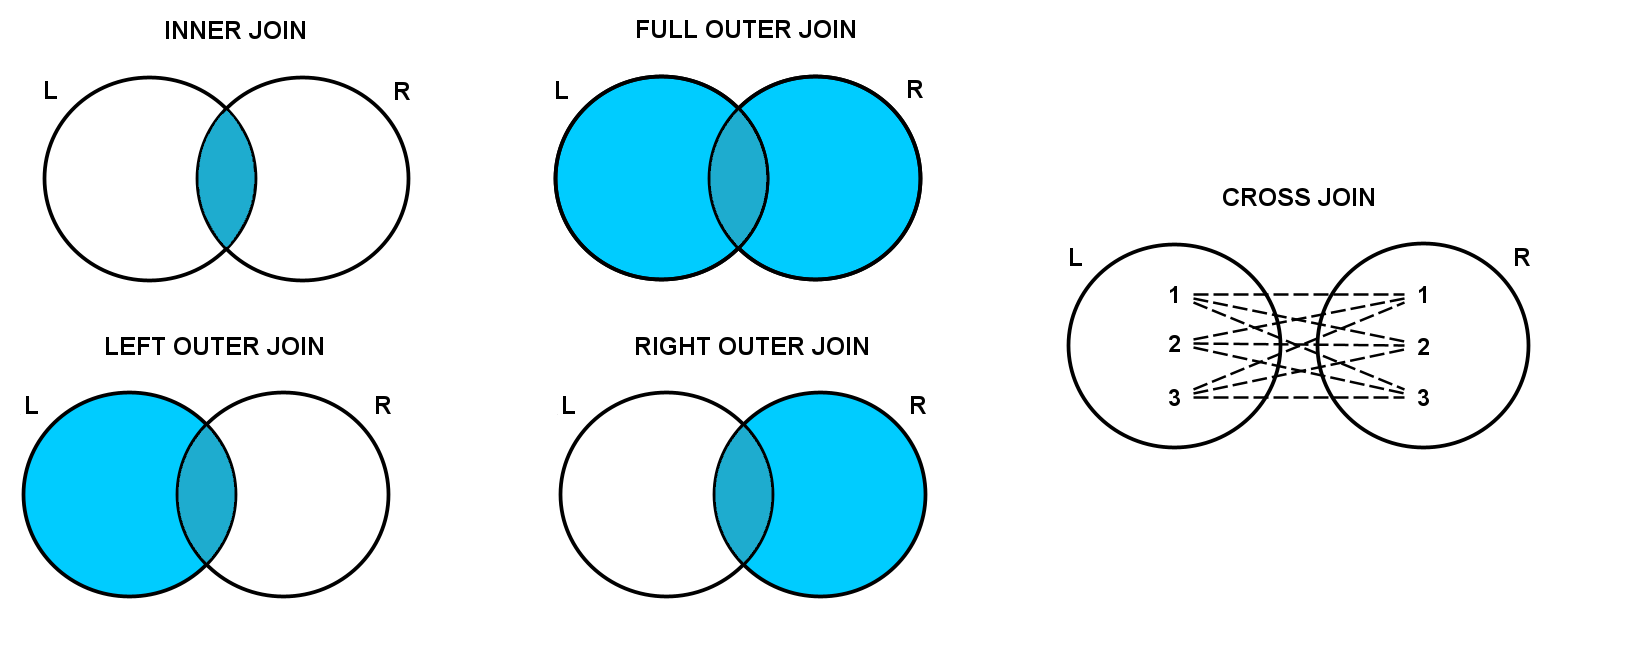

In [3]:
Image("files/joins/joins.png")

## Merge & Join (_how = 'inner'/ 'left' / 'right' / 'outer' / 'cross'_)

    С помощью параметра how мы можем обозначить тип объединения таблиц 

#### Левая таблица: сотрудники отдела рекламы (идентификатор сотрудника и его фамилия с инициалами)
#### Правая таблица: список выделенных проектов (идентификатор менеджера проекта и код проекта)

#### Задача: соединить эти таблицы таким образом, чтобы в результирующей таблице появились идентификаторы и фамилии менеджеров проектов, являющихся сотрудниками отдела рекламы, и коды соответствующих проектов.

#### Для этой задачи подходит тип объединения 'inner', который выставлен в методах merge и join по умолчанию.

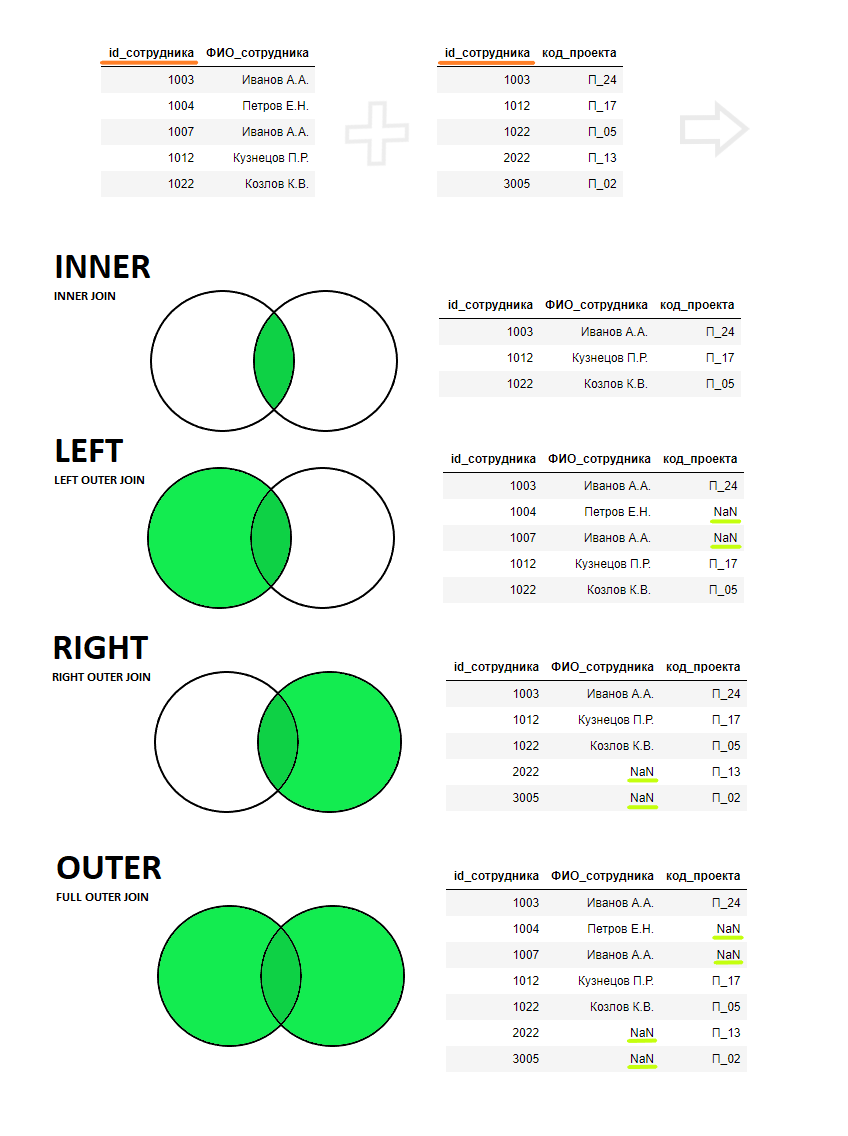

In [4]:
Image("files/joins/join_sql.png")

In [11]:
df_l=pd.read_csv('files/left_table.csv', index_col=0)
df_r=pd.read_csv('files/right_table.csv', index_col=0)
display(df_l,df_r)

,id_сотрудника,ФИО_сотрудника
0,1003,Иванов А.А.
1,1004,Петров Е.Н.
2,1007,Иванов А.А.
3,1012,Кузнецов П.Р.
4,1022,Козлов К.В.


,id_сотрудника,код_проекта
0,1003,П_24
1,1012,П_17
2,1022,П_05
3,2022,П_13
4,3005,П_02


In [12]:
# По умолчанию в функции merge стоит тип объединенния 'inner'

display(pd.merge(df_l, df_r),
        pd.merge(df_l, df_r, how='left'),
        pd.merge(df_l, df_r, how='right'),
        pd.merge(df_l, df_r, how='outer'))

,id_сотрудника,ФИО_сотрудника,код_проекта
0,1003,Иванов А.А.,П_24
1,1012,Кузнецов П.Р.,П_17
2,1022,Козлов К.В.,П_05


,id_сотрудника,ФИО_сотрудника,код_проекта
0,1003,Иванов А.А.,П_24
1,1004,Петров Е.Н.,NaN
2,1007,Иванов А.А.,NaN
3,1012,Кузнецов П.Р.,П_17
4,1022,Козлов К.В.,П_05


,id_сотрудника,ФИО_сотрудника,код_проекта
0,1003,Иванов А.А.,П_24
1,1012,Кузнецов П.Р.,П_17
2,1022,Козлов К.В.,П_05
3,2022,NaN,П_13
4,3005,NaN,П_02


,id_сотрудника,ФИО_сотрудника,код_проекта
0,1003,Иванов А.А.,П_24
1,1004,Петров Е.Н.,NaN
2,1007,Иванов А.А.,NaN
3,1012,Кузнецов П.Р.,П_17
4,1022,Козлов К.В.,П_05
5,2022,NaN,П_13
6,3005,NaN,П_02


# Часть 2

# Функция merge & Метод merge

# pd.merge() & pd.DataFrame.merge()

_Функция pandas.merge() и метод merge() pandas.DataFrame используются для объединения нескольких объектов pandas.DataFrame на основе столбцов или индексов._

_Функция pandas.merge() требует два объекта DataFrame в качестве первого левого и второго правого аргументов. А в случае использования метода merge() мы вызывааем метод для DataFrame, соответствующего левой таблице (left), и указываем в качестве аргумента DataFrame, соответствующий правой таблице (right)._

### pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

    Разберем наиболее часто используемые аргументы данной функции:
    
    • left: DataFrame
    - "левая" структура DataFrame.
    • right: DataFrame
    - "правая" структура DataFrame.
    
    • how: {'left', 'right', 'outer', 'inner'}; значение по умолчанию: 'inner'
    - Один из методов объединения: 'left', 'right', 'outer','inner':
    ▪ 'left' - это аналог SQL операции 'LEFT OUTER JOIN' при этом будут использоваться ключи только из левого DataFrame.
    ▪ 'right' - аналог SQL операции 'RIGHT OUTER JOIN' - используются ключи из правого DataFrame.
    ▪ 'outer' - аналог SQL операции 'FULL OUTER JOIN' - используется объединение ключей из правого и левого DataFrame.
    ▪ 'inner' - аналог SQL операции 'INNER JOIN' - используется пересечение ключей из правого и левого DataFrame.
    
    • on: имя одного столбца или список имен столбцов
    - Список имен столбцов для объединения, столбцы должны входить как в левый, так и в правый DataFrame.
    • left_on: имя одного столбца или список имен столбцов левого DataFrame
    - Список столбцов левого DataFrame, которые будут использоваться как ключи.
    • right_on: имя одного столбца или список имен столбцов правого DataFrame
    - Список столбцов из правого DataFrame, которые будут использоваться как ключи.
    
    • left_index: bool; значение по умолчанию: False
    - Если параметр равен True, то будет использован индекс (метки строк) из левого DataFrame в качестве ключа(ей) для объединения.
    • right_index: bool; значение по умолчанию: False
    - Если параметр равен True, то будет использован индекс (метки строк) из правого DataFrame в качестве ключа(ей) для объединения.
    
    • sort: bool; значение по умолчанию: False
    - Если параметр равен True, то данные в полученном DataFrame будут отсортированы в лексикографическом порядке.
    
    • suffixes=('_x', '_y')
    
    • indicator=False

In [13]:
df_ab = pd.DataFrame({'a': ['a_1', 'a_2', 'a_3'], 'b': ['b_1', 'b_2', 'b_3']})
df_ac = pd.DataFrame({'a': ['a_1', 'a_2', 'a_4'], 'c': ['c_1', 'c_2', 'c_4']})
display(df_ab, df_ac)

,a,b
0,a_1,b_1
1,a_2,b_2
2,a_3,b_3


,a,c
0,a_1,c_1
1,a_2,c_2
2,a_4,c_4


In [14]:
# Функция pd.merge() требует два объекта DataFrame в качестве первого (левого) и второго (правого) аргументов

pd.merge(df_ab, df_ac)

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2


In [15]:
# Здесь мы вызываем метода merge() для DataFrame, соответствующего левой таблице
# и указываем в качестве аргумента DataFrame, соответствующий правой таблице

df_ab.merge(df_ac)

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2


# Колонка для ключа (аргументы on, left_on, right_on)

In [16]:
# по умолчанию в качестве ключа используются столбцы с одинаковыми именами в двух объектах DataFrame
# чтобы явно указать имя столбца используем аргумент 'on'

pd.merge(df_ab, df_ac, on='a')

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2


In [17]:
# в переменной df_ac2 создаем новый DataFrame, содержащий колонку с именем 'a_'

# Аргументы left_on и right_on позволяют указать имена столбцов,
# которые будут использоваться в качестве ключей в каждом DataFrame отдельно

# в результирующем DataFrame обе колонки остаются

df_ac2 = df_ac.rename(columns={'a': 'a_'})
display(df_ac2)
display(pd.merge(df_ab, df_ac2, left_on='a', right_on='a_'))

,a_,c
0,a_1,c_1
1,a_2,c_2
2,a_4,c_4


,a,b,a_,c
0,a_1,b_1,a_1,c_1
1,a_2,b_2,a_2,c_2


In [18]:
# можно удалить неиспользуемый столбец с помощью метода drop()

pd.merge(df_ab, df_ac2, left_on='a', right_on='a_').drop(columns='a_')

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2


# Тип слияния: параметр how

## INNER JOIN: how='inner'


In [19]:
# аргумент how по умолчанию стоит в значении 'inner'
# pd.merge(df_ab, df_ac, on='a', how='inner')

pd.merge(df_ab, df_ac, on='a')

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2


## LEFT JOIN: how='left'

In [20]:
# аналог ВПР (VLOOKUP) в Excel:

pd.merge(df_ab, df_ac, on='a', how='left')

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2
2,a_3,b_3,NaN


## RIGHT JOIN: how='right'

In [21]:
pd.merge(df_ab, df_ac, on='a', how='right')

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2
2,a_4,NaN,c_4


## OUTER JOIN: how='outer'

In [22]:
pd.merge(df_ab, df_ac, on='a', how='outer')

,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2
2,a_3,b_3,NaN
3,a_4,NaN,c_4


## CROSS JOIN: how='cross'

In [23]:
# по умолчанию к пересекающимся именам столбцов добавляются суффиксы _x и _y.
pd.merge(df_ab, df_ac, how='cross')

,a_x,b,a_y,c
0,a_1,b_1,a_1,c_1
1,a_1,b_1,a_2,c_2
2,a_1,b_1,a_4,c_4
3,a_2,b_2,a_1,c_1
4,a_2,b_2,a_2,c_2
5,a_2,b_2,a_4,c_4
6,a_3,b_3,a_1,c_1
7,a_3,b_3,a_2,c_2
8,a_3,b_3,a_4,c_4


In [24]:
pd.merge(df_ab, df_ac, on='a', how='cross')
# MergeError: Can not pass on, right_on, left_on or set right_index=True or left_index=True

MergeError: Can not pass on, right_on, left_on or set right_index=True or left_index=True

## Добавление информационного столбца: indicator

In [25]:
pd.merge(df_ab, df_ac, on='a', how='inner', indicator=True)

,a,b,c,_merge
0,a_1,b_1,c_1,both
1,a_2,b_2,c_2,both


In [26]:
pd.merge(df_ab, df_ac, on='a', how='outer', indicator=True)

,a,b,c,_merge
0,a_1,b_1,c_1,both
1,a_2,b_2,c_2,both
2,a_3,b_3,NaN,left_only
3,a_4,NaN,c_4,right_only


In [27]:
pd.merge(df_ab, df_ac, on='a', how='outer', indicator='indicator')

,a,b,c,indicator
0,a_1,b_1,c_1,both
1,a_2,b_2,c_2,both
2,a_3,b_3,NaN,left_only
3,a_4,NaN,c_4,right_only


## Суффиксы для пересекающихся имен столбцов: suffixes

In [28]:
df_ac_b = df_ac.rename(columns={'c': 'b'})
display(df_ab, df_ac_b)

,a,b
0,a_1,b_1
1,a_2,b_2
2,a_3,b_3


,a,b
0,a_1,c_1
1,a_2,c_2
2,a_4,c_4


In [29]:
pd.merge(df_ab, df_ac_b, on='a')

,a,b_x,b_y
0,a_1,b_1,c_1
1,a_2,b_2,c_2


In [30]:
pd.merge(df_ab, df_ac_b, on='a', suffixes=['_left', '_right'])

,a,b_left,b_right
0,a_1,b_1,c_1
1,a_2,b_2,c_2


## Использование нескольких столбцов в качестве ключей

In [31]:
df_abx = df_ab.assign(x=['x_2', 'x_2', 'x_3'])
df_acx = df_ac.assign(x=['x_1', 'x_2', 'x_2'])

In [32]:
display(df_abx, df_acx)

,a,b,x
0,a_1,b_1,x_2
1,a_2,b_2,x_2
2,a_3,b_3,x_3


,a,c,x
0,a_1,c_1,x_1
1,a_2,c_2,x_2
2,a_4,c_4,x_2


In [33]:
pd.merge(df_abx, df_acx)

,a,b,x,c
0,a_2,b_2,x_2,c_2


In [34]:
pd.merge(df_abx, df_acx, on=['a', 'x'])

,a,b,x,c
0,a_2,b_2,x_2,c_2


In [35]:
pd.merge(df_abx, df_acx, on='a')

,a,b,x_x,c,x_y
0,a_1,b_1,x_2,c_1,x_1
1,a_2,b_2,x_2,c_2,x_2


In [36]:
df_acx_ = df_acx.rename(columns={'x': 'x_'})
df_acx_

,a,c,x_
0,a_1,c_1,x_1
1,a_2,c_2,x_2
2,a_4,c_4,x_2


In [37]:
pd.merge(df_abx, df_acx_, left_on=['a', 'x'], right_on=['a', 'x_'])

,a,b,x,c,x_
0,a_2,b_2,x_2,c_2,x_2


In [38]:
display(pd.merge(df_abx, df_acx, on=['a', 'x'], how='inner'),
        pd.merge(df_abx, df_acx, on=['a', 'x'], how='left'), 
        pd.merge(df_abx, df_acx, on=['a', 'x'], how='right'), 
        pd.merge(df_abx, df_acx, on=['a', 'x'], how='outer'), 
        pd.merge(df_abx, df_acx, how='cross'))


,a,b,x,c
0,a_2,b_2,x_2,c_2


,a,b,x,c
0,a_1,b_1,x_2,NaN
1,a_2,b_2,x_2,c_2
2,a_3,b_3,x_3,NaN


,a,b,x,c
0,a_1,NaN,x_1,c_1
1,a_2,b_2,x_2,c_2
2,a_4,NaN,x_2,c_4


,a,b,x,c
0,a_1,b_1,x_2,NaN
1,a_2,b_2,x_2,c_2
2,a_3,b_3,x_3,NaN
3,a_1,NaN,x_1,c_1
4,a_4,NaN,x_2,c_4


,a_x,b,x_x,a_y,c,x_y
0,a_1,b_1,x_2,a_1,c_1,x_1
1,a_1,b_1,x_2,a_2,c_2,x_2
2,a_1,b_1,x_2,a_4,c_4,x_2
3,a_2,b_2,x_2,a_1,c_1,x_1
4,a_2,b_2,x_2,a_2,c_2,x_2
5,a_2,b_2,x_2,a_4,c_4,x_2
6,a_3,b_3,x_3,a_1,c_1,x_1
7,a_3,b_3,x_3,a_2,c_2,x_2
8,a_3,b_3,x_3,a_4,c_4,x_2


## Использование индекса в качестве ключа: left_index, right_index



In [39]:
df_ac_i = df_ac.set_index('a')
display(df_ac_i)


display(pd.merge(df_ab, df_ac_i, left_on='a', right_index=True))

,c
a,
a_1,c_1
a_2,c_2
a_4,c_4


,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2


In [40]:
df_ab_i = df_ab.set_index('a')
display(df_ab_i)

display(pd.merge(df_ab_i, df_ac_i, left_index=True, right_index=True))

,b
a,
a_1,b_1
a_2,b_2
a_3,b_3


,b,c
a,,
a_1,b_1,c_1
a_2,b_2,c_2


# Часть 3

## Базовое использование метода join()

In [41]:
display(df_ab_i, df_ac_i)

,b
a,
a_1,b_1
a_2,b_2
a_3,b_3


,c
a,
a_1,c_1
a_2,c_2
a_4,c_4


### Аргумент how в методе join()

### _Метод join() объединяет объекты DataFrame на основе их индекса и по умолчанию использует левое объединение (how='left')_.

In [42]:
display(df_ab_i.join(df_ac_i))

,b,c
a,,
a_1,b_1,c_1
a_2,b_2,c_2
a_3,b_3,NaN


In [ ]:
display(df_ab_i.join(df_ac_i, how='inner'), 
        df_ab_i.join(df_ac_i, how='left'), 
        df_ab_i.join(df_ac_i, how='right'), 
        df_ab_i.join(df_ac_i, how='outer'), 
        df_ab_i.join(df_ac_i, how='cross'))


### Аргумент on в методе join()

In [43]:
display(df_ab, df_ac_i)


display(df_ab.join(df_ac_i, on='a'))

,a,b
0,a_1,b_1
1,a_2,b_2
2,a_3,b_3


,c
a,
a_1,c_1
a_2,c_2
a_4,c_4


,a,b,c
0,a_1,b_1,c_1
1,a_2,b_2,c_2
2,a_3,b_3,NaN


## lsuffix and rsuffix

In [44]:
df_ab_i2 = df_ac_i.rename(columns={'c': 'b'})
display(df_ab_i2)

# print(df_ab_i.join(df_ab_i2))
# ValueError: columns overlap but no suffix specified: Index(['b'], dtype='object')

display(df_ab_i.join(df_ab_i2, lsuffix='_left', rsuffix='_right'))

,b
a,
a_1,c_1
a_2,c_2
a_4,c_4


,b_left,b_right
a,,
a_1,b_1,c_1
a_2,b_2,c_2
a_3,b_3,NaN


## Объединение сразу нескольких DataFrame с помощью метода join()

In [45]:
df_ad_i = pd.DataFrame({'a': ['a_1', 'a_4', 'a_5'], 'd': ['d_1', 'd_4', 'd_5']}).set_index('a')
display(df_ad_i)

,d
a,
a_1,d_1
a_4,d_4
a_5,d_5


In [46]:
display(df_ab_i, df_ac_i, df_ad_i)

,b
a,
a_1,b_1
a_2,b_2
a_3,b_3


,c
a,
a_1,c_1
a_2,c_2
a_4,c_4


,d
a,
a_1,d_1
a_4,d_4
a_5,d_5


In [47]:
display(df_ab_i.join([df_ac_i, df_ad_i]), 
        df_ac_i.join([df_ad_i, df_ab_i]))

,b,c,d
a,,,
a_1,b_1,c_1,d_1
a_2,b_2,c_2,NaN
a_3,b_3,NaN,NaN


,c,d,b
a,,,
a_1,c_1,d_1,b_1
a_2,c_2,NaN,b_2
a_4,c_4,d_4,NaN
